In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Generating data for unit testing**

In [30]:
mean1 = np.array([0,0])
mean2 = np.array([2,0])

P = np.array([[1,1], [-1,1]]) # matrice de changement de base, pour pencher ma distribution
cov1 = np.dot(np.dot(P, np.array([[0.1,0],[0,1]])), np.linalg.inv(P))
cov2 = np.dot(np.dot(P, np.array([[1,0],[0,0.1]])), np.linalg.inv(P))

In [31]:
cov1

array([[ 0.55,  0.45],
       [ 0.45,  0.55]])

In [32]:
cov2

array([[ 0.55, -0.45],
       [-0.45,  0.55]])

In [33]:
P

array([[ 1,  1],
       [-1,  1]])

In [34]:
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

In [35]:
print(x)
print(y)

[ 0.57830787  0.55421021  0.73845472 -0.32703281 -0.72656772 -0.33486311
  0.13507564  0.3859635   0.08487285  0.00633182 -0.16092876 -1.16081299
 -0.54689274 -0.78500579  0.80724815 -0.3378257   0.20675904 -0.47377517
  0.03920772  0.09595772  0.05759032 -0.0673104   0.1141986   0.28455198
  0.2707973  -0.45714465 -0.43955124 -0.44646384 -0.7371648   1.70118645
 -0.29034917 -1.37628817  1.2310928   0.0422085   0.645467   -1.35323915
 -0.27823458 -0.0354389  -0.18263363 -0.03450168  0.59807995 -2.09766272
 -0.72949195  0.20231156  0.8216979  -1.17288782  0.38827776  0.50625879
  0.56406096 -1.3333842  -0.73187278  0.18511341  0.4702788  -0.16120783
  0.10140543 -0.24534215 -0.82419175  0.73296697 -0.55689795 -1.63037201
  0.61635059 -0.60021951  1.15893619 -0.54141513  0.69956003 -1.70761601
 -0.19750191 -0.98182143  0.58029546 -0.20331938 -0.04331733  0.74436105
  0.22182557 -0.18351105  0.56755279 -0.52413726  0.61732698 -0.6189702
  0.27517765  0.08000309 -1.25469967 -0.69832346  0.

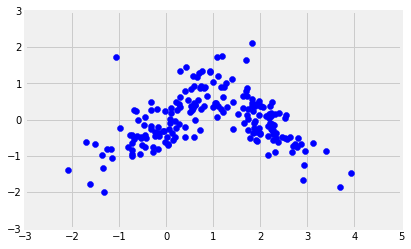

In [36]:
plt.axis([-3,5,-3,3])
plt.scatter(x, y, color="blue")

In [37]:
one = np.ones(len(x)).reshape(len(x), 1) # for the bias

X, y = np.concatenate([one, x.reshape(len(x), 1)], axis=1) , y.reshape(len(y), 1)

In [38]:
print(X)
print(y)

[[ 1.          0.57830787]
 [ 1.          0.55421021]
 [ 1.          0.73845472]
 [ 1.         -0.32703281]
 [ 1.         -0.72656772]
 [ 1.         -0.33486311]
 [ 1.          0.13507564]
 [ 1.          0.3859635 ]
 [ 1.          0.08487285]
 [ 1.          0.00633182]
 [ 1.         -0.16092876]
 [ 1.         -1.16081299]
 [ 1.         -0.54689274]
 [ 1.         -0.78500579]
 [ 1.          0.80724815]
 [ 1.         -0.3378257 ]
 [ 1.          0.20675904]
 [ 1.         -0.47377517]
 [ 1.          0.03920772]
 [ 1.          0.09595772]
 [ 1.          0.05759032]
 [ 1.         -0.0673104 ]
 [ 1.          0.1141986 ]
 [ 1.          0.28455198]
 [ 1.          0.2707973 ]
 [ 1.         -0.45714465]
 [ 1.         -0.43955124]
 [ 1.         -0.44646384]
 [ 1.         -0.7371648 ]
 [ 1.          1.70118645]
 [ 1.         -0.29034917]
 [ 1.         -1.37628817]
 [ 1.          1.2310928 ]
 [ 1.          0.0422085 ]
 [ 1.          0.645467  ]
 [ 1.         -1.35323915]
 [ 1.         -0.27823458]
 

In [39]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, d=2):
    return (np.dot(x1, x2) + 1)**d

def gaussian_kernel(x1, x2, gamma=1):
    # experimentally : the bigger gamma is, the higher is the capacity of the model
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)
def exponential_kernel(x1, x2, gamma=1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2))

def K(X1, X2, kernel=polynomial_kernel):
    return np.array([[kernel(X1[i], X2[j]) for i in range(X1.shape[0])] for j in range(X1.shape[0])])

def kappa(X1, x2, kernel=polynomial_kernel):
    return np.array([kernel(X1[i], x2) for i in range(len(X1))])

In [40]:
S = K(X, X)
lamda = 0.1
print(y.shape)
print(S.shape)
print(np.linalg.inv(S + lamda * np.eye(len(S))))

(200, 1)
(200, 200)
[[ 9.90873898 -0.09114355 -0.09126952 ..., -0.04677099 -0.08197664
  -0.08506325]
 [-0.09114355  9.90895051 -0.09100472 ..., -0.04585039 -0.08133056
  -0.08448347]
 [-0.09126952 -0.09100472  9.90778137 ..., -0.05270738 -0.08552748
  -0.08813529]
 ..., 
 [-0.04677099 -0.04585039 -0.05270738 ...,  9.91228043 -0.06986703
  -0.0665998 ]
 [-0.08197664 -0.08133056 -0.08552748 ..., -0.06986703  9.91186409
  -0.08872155]
 [-0.08506325 -0.08448347 -0.08813529 ..., -0.0665998  -0.08872155
   9.91021757]]


In [41]:
def f(x, S, kernel):
    return np.dot(np.dot(y.transpose(), np.linalg.inv(S + lamda * np.eye(len(S)))), kappa(X, x, kernel=kernel))

def F(x_vect, kernel):
    S = K(X, X, kernel=kernel)
    return np.array([f(x_vect[i], S, kernel) for i in range(len(x_vect))])

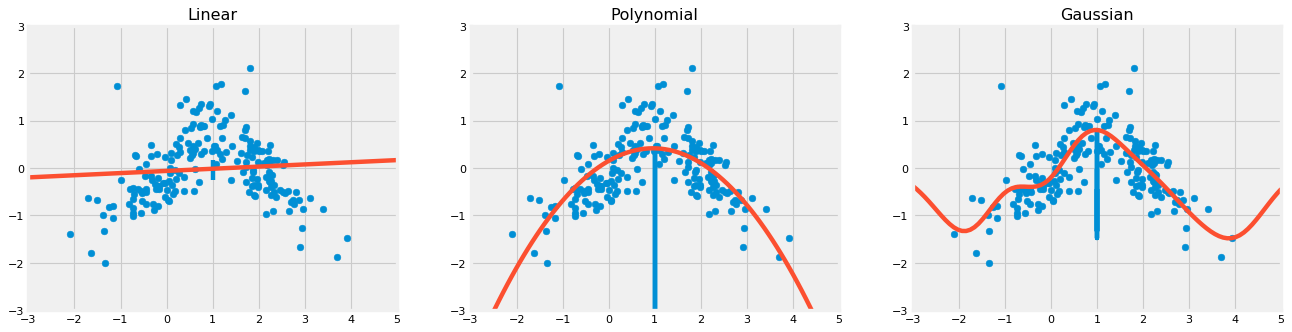

In [42]:
plt.rcParams["figure.figsize"] = (12,12)

new_x = np.concatenate([np.ones(101).reshape(101,1), np.linspace(-4, 5, 101).reshape(101, 1)], axis=1)

y_linear = F(new_x, linear_kernel)
y_poly = F(new_x, polynomial_kernel)
y_gauss = F(new_x, gaussian_kernel)
y_tanh = F(new_x, tanh_kernel)
y_rq = F(new_x, rational_quadratic_kernel)
y_power = F(new_x, power_kernel)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(331)
plt.title("Linear")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_linear)

plt.subplot(332)
plt.title("Polynomial")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_poly)

plt.subplot(333)
plt.title("Gaussian")
plt.axis([-3,5,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_gauss)

**Polynomial and Gaussian perform best for the chosen dataset**